# Move Control Data Analyzer
Parses and plots the data from the drive train in order to fine tune its PID parameters

## Usage

* Set `dataUrl` to a link which points to the raw txt file you want to process. 
* Set `outputText`, `plotDistanceToTarget`, `plotSpeed`, and `plotAppliedVoltage` to customize the output style

Run the parser by clicking in the cell with code, and pressing the "run" button (located in the row of icons, it looks like a play/pause symbol).


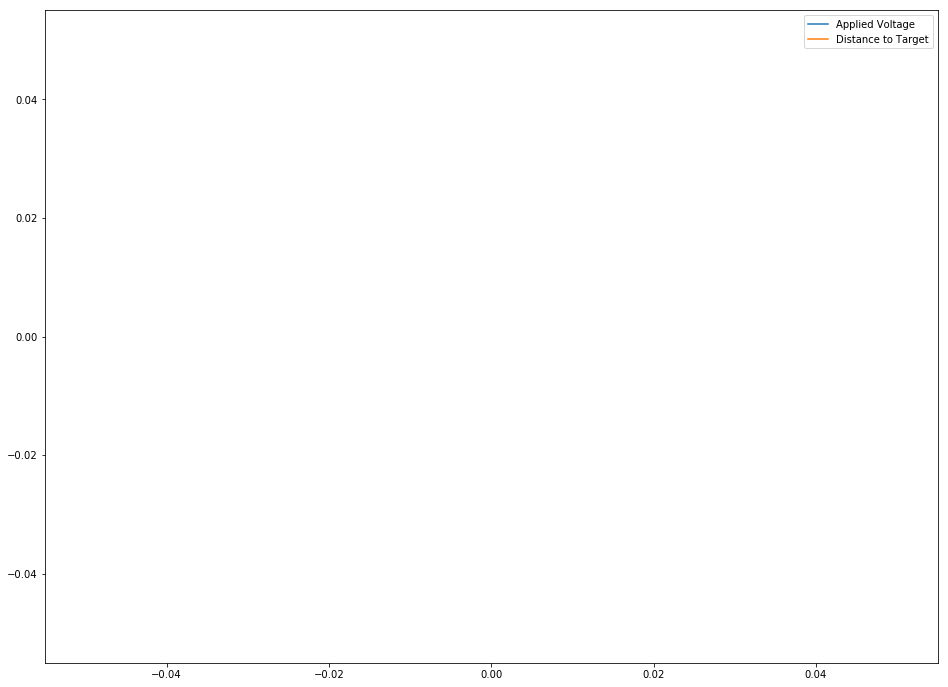

In [1]:
%matplotlib inline   
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

dataUrl = "https://raw.githubusercontent.com/PARobotics/Analysis-Data/master/2017-2018/August/15/Cone%20Lift%20Hold/1.txt"
outputText = False

plotDistanceToTarget = 1
plotSpeed = 0
plotAppliedVoltage = 1


with urllib.request.urlopen(dataUrl) as url:
    s = url.read().decode("utf8").split("\n")   
    
lines = []
    
for line in s:
    if "[MOVE] " in line and len(line.split(" ")) == 4: 
        line = line.replace("[MOVE] ", "")
        lines.append(line)
        
plt.figure(figsize = (16,12))
    
speed = []
appliedVoltage = []
distanceToTarget = []
    
for line in lines:
    if outputText: print(line)
    line = line.replace("\r", "").split(" ")
    if plotSpeed: speed.append(int(line[1]))
    if plotAppliedVoltage: appliedVoltage.append(int(line[2]))
    if plotDistanceToTarget: distanceToTarget.append(int(line[0]))
        
if plotSpeed: plt.plot(speed, label = "Speed")
if plotAppliedVoltage: plt.plot(appliedVoltage, label = "Applied Voltage")
if plotDistanceToTarget: plt.plot(distanceToTarget, label = "Distance to Target")
        
plt.plot([0, len(lines)], [0, 0], "--")
    
plt.legend()
plt.show()